**Engy-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024; Prof. V. F. de Almeida

# Tritium Calculation for Molten Salt Reactor using FLiBe
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

**Student(s):** James Frye  <br>
**Course:** Engy-4390 Nuclear Systems Design and Analysis  <br>
**Mentor:** Prof. Subash Sharma

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**18Nov2024**

[[Readme File]](https://github.com/dpploy/engy-4390/blob/main/projects/2024/tritium/README.md)

# Table of Contents
[Introduction](#introduction)  
[Parameters](#parameters)  
[Problem Statement](#problem)  
[Objectives](#objectives)  
[Approach](#approach)  
- [MOOSE Kernels](#moose-kernels)  
- [Finite Element](#finite-element)  
- [Setup](#setup)  
- [Tests](#tests)  
  - [1D Advection-Diffusion](#advection)  

[Results and Analysis](#results-and-analysis)  
[Conclusions](#conclusions)  
[References](#references)  



## [Introduction](#intro)<a id="introduction"></a>
Recent technology advances are creating growing interest in nuclear reactors that require advance high temperature salt coolants like Molten Salt Reactor (MSR). In a MSR the fuel is dissolved in the coolant salt with operating temperature at a range of $700^{o}C$ and $1000^{o}C$. At this temperature range the liquid salt produces tritium that can diffuse through metallic heat exchangers and escape the reactor system. To avoid exceeding allowable tritium releases to the environment, tritium removal from the salt coolant and barriers is required. 

In a lithium-containing Molten Salt, the primary tritium-producing reactions as follow

$${^{6}_{3}}LiF + n → {^{4}_{2}}He + TF $$
$${^{7}_{3}}LiF + n → {^{4}_{2}}He + TF + n' $$
$${^{19}_{9}}F + n → {^{17}_{8}}O + T $$


For the simplicity of the calculation it is assumed that the tritium and the fluoride diassociate into their respective monoatomic states. In this condition the tritium does not need to react with the wall of the pipe to disassociate so it can diffuse through. 


Therefore, the purpose of this project is to understand the tritium transport phenomena and select the correct model which will be tested in MOOSE. MOOSE is a partial differential solver using Finite Element Method (FEM) developed by Idaho National Laboratory. There are already existing models available in literature that have been benchmarks such as Tritium Diffusion Evolution and Transport (TRIDENT) developed by Stempien et al (2015,2016) at MIT. 


Consider tritium flowing co-currently, at steady-state, in the main coolant leg with fuel-salt at an initial concentration, C, and velocity, v. Furthermore, sources indicate that tritium will diffuse into the pipe wall and the diffusion is limited by the mass transfer relation. The mass transfer coefficient was estimated using a Sherwood expression as such: 

$$Sh_{T_2,Pipe}=0.015Re^{0.83}Sc^{0.42}$$


## [Parameters](#toc)<a id="parameters"></a>

C = Concentration (mol/m^3) <br>
q = Concentration Flux (mol/m^3/s) <br>
r = Radius (cm) <br>
D = Diameter (cm) <br>
z = Length in Z direction (m) <br>
temp = Temperature (Kelvin) <br>
pressure = Pressure (Pascal) <br>
$\vec{v}$ = Flow velocity (cm/s) <br>
$K_t$ = Mass Transport Coefficient (m/s) <br>
$K_s$ = Tritium Solubility in Solid (mol K /(m^3 Pa)) <br>
$K_l$ = Tritium Solubility in Liquid (mol K /(m^3 Pa)) <br>
$D_s$ = Tritium Diffusivity in Solid (m^2/s) <br>
$\Phi$ = Solid Permeability (mol K/(m Pa)/s) <br>
$\frac {\Lambda} {1 + \Lambda}\\ $= Source Constant (Unitless) <br>

## [Problem Statement](#toc)<a id="problem"></a>

Consider the 1D Advection-Diffusion Equation in the z-direction when the system is closed.
\begin{align*}
\frac {dC} {dt} \ + \frac {dF(z)} {dz} = 0 \\
\end{align*}
For this case the Advection-Diffusion term (F) in the z-direction can be written as
\begin{align*}
\frac {dC} {dt} \ + \frac {d} {dz}(\vec{v}C-D\frac {dC} {dz}) = 0 \\
\end{align*}

Where the Advection Term is: <br>
$ \vec{v}C $ <br>
And the Diffusion Term is: <br>
$ -D\frac {dC} {dz}  $ <br>

The system is an open system, where tritium has the ability to leave the pipe by diffusing through the pipe wall out of the system because of this the equation above needs a term to represent this flux out of the system (J).
Assuming the problem has reached Steady State, the change in the time equals zero ($ \frac {dC} {dt}  = 0) $ the equation becomes:
\begin{align*}
\frac {d} {dz}(\vec{v}C-D\frac {dC} {dz}) - J = 0 \\
\end{align*}
Such that for all $ C: [(z_a, z_b);] ∈ Real → Real $. <br>

Where J is the flux out of the pipe <br>
At Steady State the flux inside the liquid metal and the pipe wall are equal. Depending on which one dominates, the diffusive flux (J):
\begin{align*}
J = K_T(C - C_w,_l) = K_T C \frac {\Lambda} {1 + \Lambda}\\
\end{align*}

Where $ \Lambda $ represents the ($ \frac {flux_{max,solid}} {flux_{max,liquid}} ) $: <br>
\begin{align*}
\Lambda = \frac {2 D_s K_s} {K_T K_l d ln(d_o/d)} 
\end{align*}

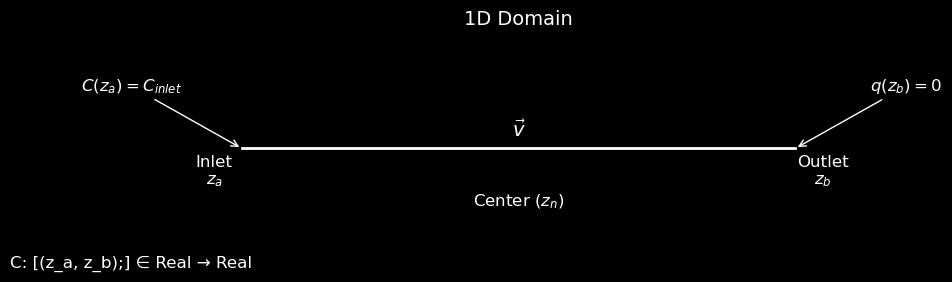

In [20]:
import matplotlib.pyplot as plt

z_start, z_end = 0, 10  
r_position = 0.5        

fig, ax = plt.subplots(figsize=(10, 3))

ax.plot([z_start, z_end], [r_position, r_position], color='white', linewidth=2)

ax.text(z_start - 0.5,  r_position - 0.2, "Inlet\n$z_a$", fontsize=12, ha='center', va='center')
ax.text(z_end + 0.5, r_position -0.2, "Outlet\n$z_b$", fontsize=12, ha='center', va='center')
ax.text((z_start + z_end) / 2, r_position + 0.1, "$\\vec{v}$", fontsize=14, ha='center')


ax.annotate(
    "$C(z_a) = C_{inlet}$",
    xy=(z_start, r_position), xytext=(z_start - 2, r_position + 0.5),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12, ha='center'
)

ax.annotate(
    "$q(z_b) = 0$",
    xy=(z_end, r_position), xytext=(z_end + 2, r_position + 0.5),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=12, ha='center'
)


ax.text((z_start + z_end) / 2, r_position - 0.5, "Center ($z_n$)", fontsize=12, ha='center')
ax.text(z_start - 2,  r_position - 1, "C: [(z_a, z_b);] ∈ Real → Real", fontsize=12, ha='center', va='center')

ax.set_xlim(z_start - 2, z_end + 2)
ax.set_ylim(r_position - 1, r_position + 1)
ax.axis('off') 


ax.set_title("1D Domain", fontsize=14)

#plt.savefig('domain.png') 
plt.show()

In [2]:
import os
import math
#os.system('/usr/bin/Xvfb :99 -screen 0 1024x768x24 &')
#os.environ['DISPLAY'] = ':99'

#import panel as pn
#pn.extension('vtk')



### new cell simple plot ###

In [3]:
### '''Domain'''
def show_domain():
    import pyvista as pv
    pv.set_plot_theme('paraview')

    height = 15
    radius = 0.5 
    coolant = pv.Cylinder(center=(0,0,0), direction=(1,0,0), height=height, radius=radius)

    plo = pv.Plotter(notebook=True,shape=(1,1)) 
    plo.add_mesh(coolant, color='grey', opacity=1.0,)
   
    plo.add_axes(xlabel='Z', ylabel='R', zlabel='')
    plo.set_viewup([0,1,0])
   
    cpos = plo.show(window_size=[800, 600])

In [4]:
show_domain()

Widget(value='<iframe src="http://localhost:53295/index.html?ui=P_0x182852a4b90_0&reconnect=auto" class="pyvis…

## [Objectives](#toc)<a id="obj"></a>

1. Develop a model for Diffusion of Tritium through a Pipe Wall in 1D.
2. Calculate the Analytical Solution of the 1D model.
3. Implement the Model into MOOSE and Attain an Understanding for MOOSE CFD Software.
4. Calculate the relaxation length for the diffusion of Tritium.

## [Approach](#toc)<a id="app"></a>

  1. Develop 1-D Advection-Diffusion Problem Statement.
  2. Compose Analytical Solution to verify MOOSE
  3. Implement the Advection-Diffusion Problem into MOOSE using 316SS Pipe and FLiBe Molten Salt Properties.
  4. Get the Relaxation Length for the Release of Tritium in both the Numerical and Analytical Methods and Compare.

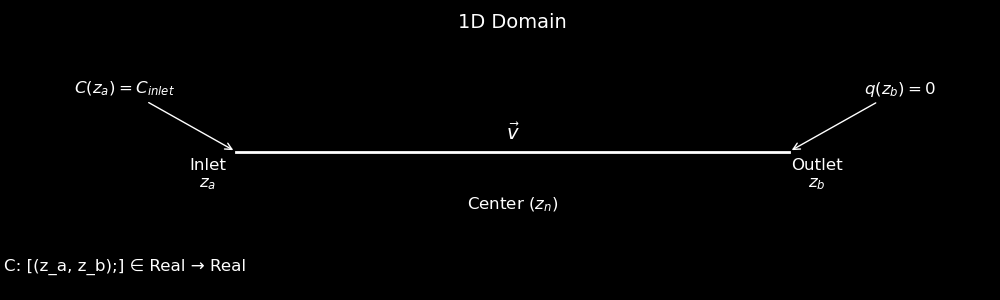

In [18]:
from IPython.display import Image

Image(filename='pics/domain.png')

### [MOOSE Kernels](#toc)<a id="kernels"></a>

In order to input the weak form of the receding problem statment into MOOSE, it must be written in inner product notation:

\begin{align*} 
( \nabla \varphi  , D \nabla C ) - < \varphi ,D \nabla C \cdot \vec{n} > + ( \varphi , \vec {v} \cdot \nabla C )=0. 
 \end{align*}

 Where, in MOOSE\
$ ( \nabla \varphi \ , \ D \nabla C\ )  = $ Kernel
 
$ < \varphi , D\nabla C\cdot \vec{n} > = $ Boundary Condition 

$ ( \varphi , \vec {v} \cdot \nabla C ) = $ Kernel 
 

Therefore the MOOSE kernels used in this project to solve are as follows:


**Diffusion Kernel** : $(D\nabla^2 C)$

 + [DiffusionTerm.h](./include/kernels/X.h) and [DiffusionTerm.C](./src/kernels/X.C)
 
 
**Advection Kernel** : $ (\vec {v} \cdot \nabla C)$

 + [AdvectionTerm.h](./include/kernels/X.h) and [AdvectionTerm.C](./src/kernels/X.C).

**Source Kernel** : $ (K_T C \frac {\Lambda} {1 + \Lambda}\\) $

 + [SourceTerm.h](./include/kernels/X.h) and [SourceTerm.C](./src/kernels/X.C)
 
**Boundary Conditions** : $ <\varphi,D\nabla C\cdot\vec{n}> $ 
 
[**Inlet**] - MOOSE implemented DirichletBC

$ C(z_a) = a $

[**Outlet**] - MOOSE implemented NeumannBC 

$ q(z_b) = 0 $



### [Setup](#toc)<a id="setup"></a>

In [6]:
'''1-D Domain'''
#Explicit Parameters to Define Domain
z_left = 0 #m
z_right = 150000 #m
r_bottom = 0 #cm
r_top_inner = 0.5 #cm #Inner Radius of Pipe
r_top_outer = 0.75 #cm #Outer Radius of Pipe
diameter_inner = 2*(r_top_inner) #cm


'''Parameters'''
temp = 950 #Kelvin
vel = 0.5 #m/s
pressure = 101325 #Pa

diff_coeff = .00000093*math.exp(-42154/((8.3144)*temp)) #m^2/s, high amount of resistance due to the bonding of Tritium as an ion
print('Diffusion Coefficient in fluid '+ '= ' + str(diff_coeff)+ ' m^2/s ')
s_source = 0
fluid_density= 2413.08 - 0.4884*(temp) #kg/m3
print('Density of fluid '+ '= ' + str(fluid_density)+ ' kg/m^3 ')
fluid_dynamic_viscosity= 0.000116*math.exp(3755/temp)  #Pa-s
print('Dynamic viscosity of fluid '+ '= ' + str(fluid_dynamic_viscosity)+ ' Pa-s ')
fluid_solubility= 0.079*math.exp(-35000/((8.3144)*temp)) #Tritium Solubility in fluid ((mol K)/(m^3 Pa)), Using Henry's Law
print('Henrys law solubility of tritium in fluid '+ '= ' + str(fluid_solubility) + ' (mol K)/(m^3 Pa)')
solid_parameter= 0.0000000872*math.exp(-41800/((8.3144)*temp)) #Diffusivity*Solubility in Solid, Unique to RAFM Steel ((mol K)/(m^3 Pa))
print('Solubility of tritium in solid '+ '= ' + str(solid_parameter) + ' (mol K)/(m s Pa^.5)')

Re =  vel * fluid_density * (diameter_inner/100) / fluid_dynamic_viscosity #Reynolds Number 
print('Reynolds Number '+ '= ' + str(Re))

schmidt_number=(fluid_dynamic_viscosity)/(fluid_density*(diff_coeff))
print('The Schmidt Number of the fluid =  ' + str(schmidt_number))

Sherwood_exp1=0.015*pow(Re,0.83)*pow(schmidt_number,0.42)
print('The Sherwood Number using the expression in the introduction =   ' + str(Sherwood_exp1))

Mass_transfer_coeff=(Sherwood_exp1*diff_coeff)/(diameter_inner/100)
print('The Mass Transfer Coeffient =  ' + str(Mass_transfer_coeff)+'  m/s')

Peclet_Number=r_top_inner*vel/diff_coeff
print('The Peclet Number of the fluid =  ' + str(Peclet_Number))

Taylor_Dispersion = diff_coeff*(1 + pow(Peclet_Number,2)/48)
print('The Effective Taylor Dispersion of the fluid =  ' + str(Taylor_Dispersion)+ ' m^2/s ')

Diffusion Coefficient in fluid = 4.474271269723303e-09 m^2/s 
Density of fluid = 1949.1 kg/m^3 
Dynamic viscosity of fluid = 0.006040377385703471 Pa-s 
Henrys law solubility of tritium in fluid = 0.0009401909518689916 (mol K)/(m^3 Pa)
Solubility of tritium in solid = 4.3875278948329706e-10 (mol K)/(m s Pa^.5)
Reynolds Number = 1613.3925709784148
The Schmidt Number of the fluid =  692.6401143382515
The Sherwood Number using the expression in the introduction =   107.52976874322978
The Mass Transfer Coeffient =  4.811173549278239e-05  m/s
The Peclet Number of the fluid =  55875020.74174873
The Effective Taylor Dispersion of the fluid =  291015.73302994575 m^2/s 


In [7]:
'''Data (boundary conditions)'''

u_inlet = 3.6e-07 #mol/m^3
q_outlet = 0 #mol/m^3 #There is no more diffusion at the end of pipe, using arbitrarily large pipe to make sure this is actually true
ambient_conc = 0 #mol/m^3 #Concentration in the Vacuum
velocity= vel #m/s

In [8]:
'''Calculating the Closure (Source) Term'''

phi = solid_parameter
Lambda = 2*phi / (Mass_transfer_coeff * fluid_solubility * diameter_inner * math.log(r_top_outer/r_top_inner))
print('Lambda =  ' + str(Lambda))
source_constant = (Mass_transfer_coeff/diameter_inner) * (Lambda/(Lambda + 1))
print('Source Constant (Unitless) =  ' + str(source_constant))

#Analytical Solution Roots
root1 = (-vel + math.sqrt(1*pow(vel,2)-(4*-source_constant*-diff_coeff)))/(2*-diff_coeff)
root2 = (-vel - math.sqrt(1*pow(vel,2)-(4*-source_constant*-diff_coeff)))/(2*-diff_coeff)
print('The Analytical Solution Roots Are ' + str(-root1) + ' and ' + str(root2))
#Analytical Solution Constants
constant1 = u_inlet/(1-(root1/root2)-math.exp(z_right*(root1-root2)))
constant2 = u_inlet-constant1
print('The Analytical Solution Constants Are ' + str(constant1) + ' and ' + str(constant2))
#Constant 1 approaches C_inlet
#Constant 2 approaches 0

Lambda =  0.047844201242678755
Source Constant (Unitless) =  2.1967650842762097e-06
The Analytical Solution Roots Are -4.391988404645953e-06 and 111750041.48349307
The Analytical Solution Constants Are 3.6000000000001413e-07 and -1.4134862307306137e-20


In [9]:
'''Develop the FEM Solution'''

n_felem = 500

order = 'second'

n_plot_pts = n_felem + 1

In [10]:
'''Write input file function'''

def write_input_file():
    import pyhit
    import moosetree
    root = pyhit.load('')

    # Tritium Transport
    # UMass Lowell Nuclear Chemical Engineering
    # Student: James Frye
    # Personal Instructor (PI): Dr. Shubash Sharma
    # Date: 2024-11-6

    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'XYZ'

    mesh = root.insert(-1,'Mesh')
    
    omega = mesh.insert(-1,'omega')
    omega['type'] = 'GeneratedMeshGenerator'
    omega['dim'] = 1
    omega['xmin'] = z_left
    omega['xmax'] = z_right
    omega['nx'] = n_felem
    if order == 'second':
        omega['elem_type'] = 'edge3'

    vars = root.insert(-1,'Variables')
    
    conc = vars.insert(-1,'u')
    conc['order'] = order
    conc['family'] = 'lagrange'
    conc['initial_condition'] = u_inlet
  
    kernels = root.insert(-1,'Kernels')
    
    diff = kernels.insert(-1,'diffusion-term')
    diff['type'] = 'DiffusionTerm'
    diff['variable'] = 'u'
    diff['diffCoeff'] = -Taylor_Dispersion

    adv = kernels.insert(-1,'advection-term')
    adv['type'] = 'DiffusionTerm'
    adv['variable'] = 'u'
    adv['advCoeff'] = vel
    
    source = kernels.insert(-1,'source-term')
    source['type'] = 'SourceTerm'
    source['variable'] = 'u'
    source['sourceS'] = source_s
    source['coupledVariable'] = 'u'
    
    bcs = root.insert(-1,'BCs')
    
    xa = bcs.insert(-1,'entry-u')
    xa['type'] = 'DirichletBC'
    xa['variable'] = 'u'
    xa['boundary'] = 'left'
    xa['value'] = u_inlet
    
    xb = bcs.insert(-1,'exit-u')
    xb['type'] = 'NormalFluxBC'
    xb['variable'] = 'u'
    xb['boundary'] = 'right'
    xb['bias'] = q_outlet

    exe = root.insert(-1,'Executioner')
    exe['type'] = 'Steady'
    exe['solve_type']  = 'PJFNK'
    exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
    exe['petsc_options_value']  = 'hypre boomeramg'
    exe['l_max_its']  = 20
    exe['l_tol']  = 1e-5
    exe['nl_max_its']  = 15
    exe['nl_rel_tol']  = 1e-8
    exe['nl_abs_tol']  = 1e-8

    vp = root.insert(-1,'VectorPostprocessors')
    omega = vp.insert(-1,'omega')
    omega['type'] = 'LineValueSampler'
    omega['execute_on'] = 'timestep_end final'
    omega['variable'] = 'u'  
    omega['start_point'] = str(z_left)+' 0 0'
    omega['end_point'] = str(z_right)+' 0 0'
    omega['num_points'] = n_plot_pts
    omega['sort_by'] = 'id'

    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'

    pyhit.write('engy4390/input.hit', root)

In [11]:
#'''Write input file'''
#write_input_file()

### [Tests](#toc)<a id="tests"></a>

#### [1D Advection-Diffusion](#toc)<a id="advection"></a>

In [12]:
!type hit-files\adv-dif1D.hit

# J. R. Frye
# Tritium Transport: 1D Advection-Diffusion
# UMass Lowell Nuclear Chemical Engineering, Added Flow through pipe wall
# Student: James Frye
# Original Student: Anthony Bowers
# Personal Instructor (PI): Dr. Shubash Sharma
# 16Nov24

#Parameters
#vel = 0.5 #m/s
#D = -291015.73302994575 #Diffusion/Dispersion Coefficient, m^2/s
#K = 2.1967650842762097e-06 #Source Constant m^2/s
 
[Mesh]
  type = GeneratedMesh
  dim = 1
  xmin = 0.0
  xmax = 1500000.0
  nx = 300
  elem_type = EDGE3
[]

[Variables]
  [u]
    order = SECOND
    family = LAGRANGE
    initial_condition = 3.6e-07
  []
[]

[Kernels]
  [advection-term]
    type = AdvectionTerm
    variable = u
    velocity = 0.5
  []

  [diffusion-term]
    type = DiffusionTerm
    variable = u
	#D = 1 #Testing Variable due to divergence in solution
    D = -2.91e+05
  []

  [source-term]
    type = SourceTerm
    variable = u
    K = -2.1967650842762097e-06
  []
[]

[BCs]
  [entry]
    type = DirichletBC
    variable = u
    boundar

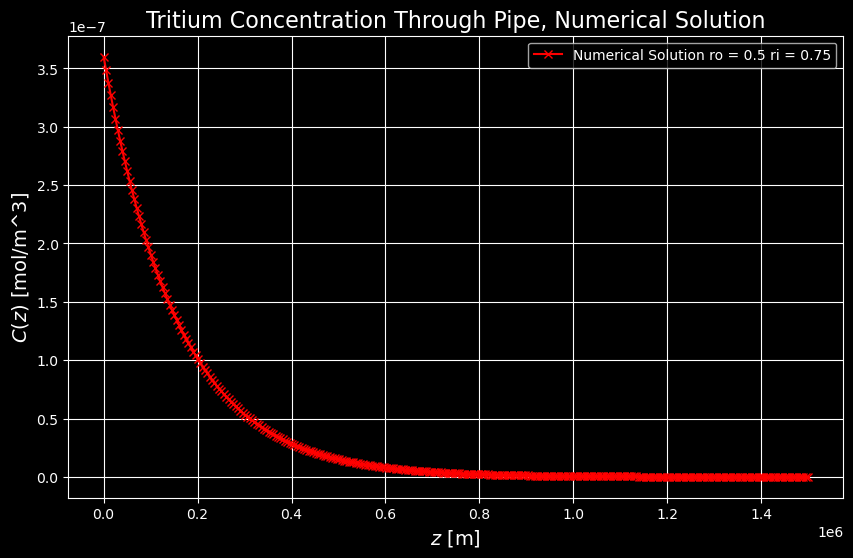

In [13]:
'''Plot function for FEM Solution'''

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('dark_background')

# Read the CSV file
file_path = 'hit-files/output_u_0002.csv' 
df = pd.read_csv(file_path)


x_column = 'x' 
y_column = 'u'

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df[x_column], df[y_column], marker='x', linestyle='-', color='r', label='Numerical Solution ro = 0.5 ri = 0.75')
plt.xlabel(r'$z$ [m]', fontsize=14)
plt.ylabel(r'$C(z)$ [mol/m^3]', fontsize=14)
plt.title('Tritium Concentration Through Pipe, Numerical Solution', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

## [Results and Analysis](#toc)<a id="ranalysis"></a>

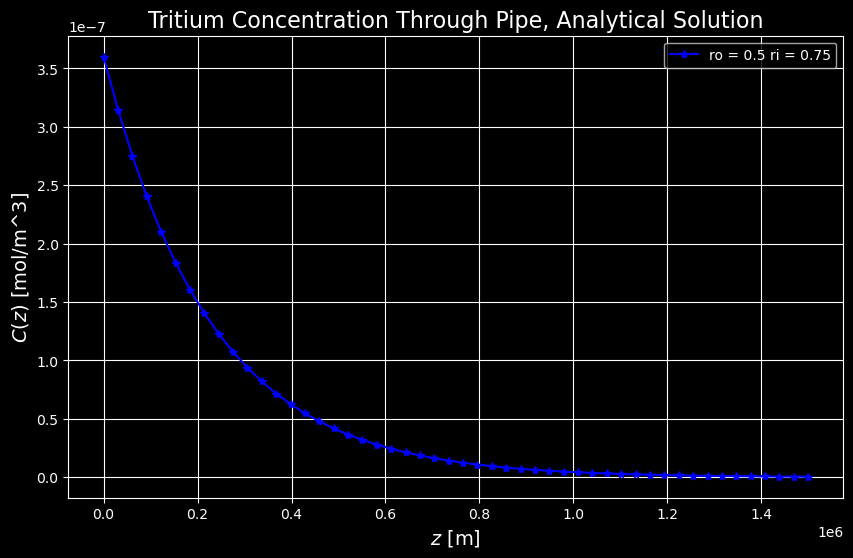

In [14]:
'''Plot the Exact Solution'''
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

# Define exact solution
x = np.linspace(0, 1500000, 50)
y = (3.6e-07) * np.exp((-4.391988404645953e-06) * x)

# Plot exact solution alone for testing
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b*-', label='ro = 0.5 ri = 0.75')
plt.xlabel(r'$z$ [m]', fontsize=14)
plt.ylabel(r'$C(z)$ [mol/m^3]', fontsize=14)
plt.title('Tritium Concentration Through Pipe, Analytical Solution', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

Fitted Exponential Decay Equation:
y = 3.599e-07 * exp(-6.341e-06 * z)


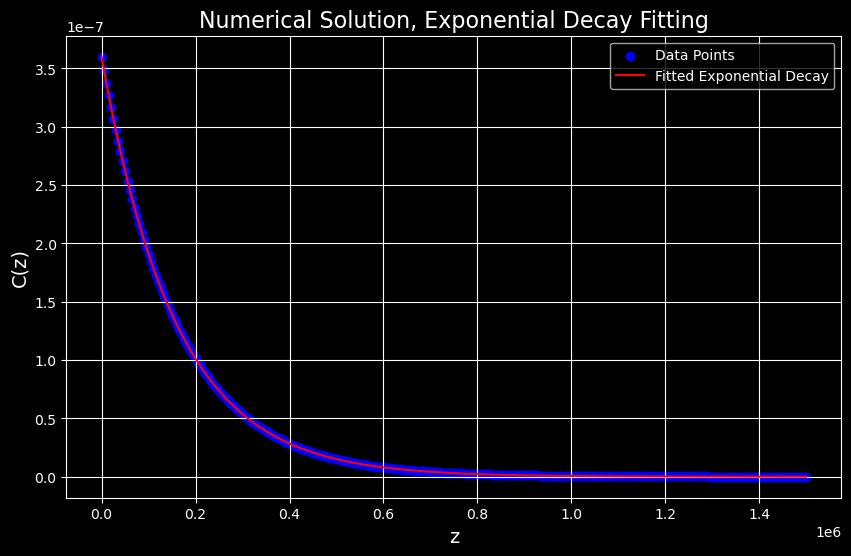

In [15]:
'''Get Fitted Function for FEM Solution'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the CSV file
file_path = 'hit-files/output_u_0002.csv'
df = pd.read_csv(file_path)


x = df['x'] 
y = df['u'] 

#Define fitted exponential function
def exp_decay(x, a, b):
    return a * np.exp(-b * x)

# Fit the exponential decay curve
initial_guess = [0.0000037, -0.000004391988404645953]  # Initial guesses for a and b
params, covariance = curve_fit(exp_decay, x, y, p0=initial_guess)

a, b = params

fitted_curve = exp_decay(x, a, b)

# Display the fitted equation
print("Fitted Exponential Decay Equation:")
print(f"y = {a:.3e} * exp(-{b:.3e} * z)")

# Plot the data points and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')  # Original data points
plt.plot(x, fitted_curve, color='red', label='Fitted Exponential Decay')  # Fitted curve
plt.xlabel('z', fontsize=14)
plt.ylabel('C(z)', fontsize=14)
plt.title('Numerical Solution, Exponential Decay Fitting', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

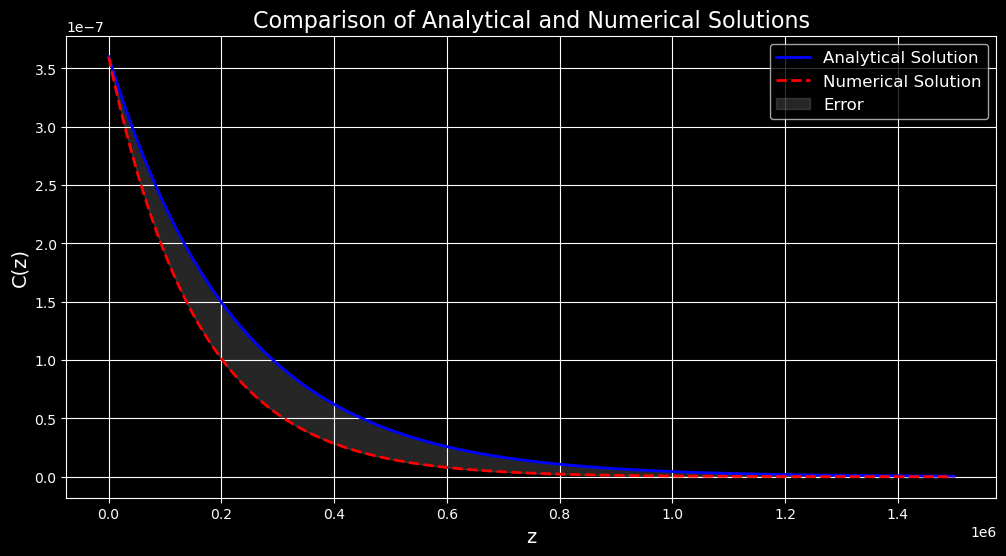

Maximum Error: 4.839287765677814e-08
Mean Error: 1.6678299141550966e-08


In [16]:
'''FEM Solution vs Analytical Solution'''

import numpy as np
import matplotlib.pyplot as plt

# Define the solutions
def analytical_solution(x):
    return 3.6e-07 * np.exp(-4.391988404645953e-06 * x)

def numerical_solution(x):
    return 3.599e-07 * np.exp(-6.341e-06 * x)


x = np.linspace(0, 1500000, 300)


y_analytical = analytical_solution(x)
y_numerical = numerical_solution(x)

# Calculate the error between the two solutions
error = np.abs(y_analytical - y_numerical)


plt.figure(figsize=(12, 6))
plt.plot(x, y_analytical, label='Analytical Solution', color='blue', linestyle='-', linewidth=2)
plt.plot(x, y_numerical, label='Numerical Solution', color='red', linestyle='--', linewidth=2)
plt.fill_between(x, y_analytical, y_numerical, color='gray', alpha=0.3, label='Error')
plt.xlabel('z', fontsize=14)
plt.ylabel('C(z)', fontsize=14)
plt.title('Comparison of Analytical and Numerical Solutions', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Display the error
print("Maximum Error:", np.max(error))
print("Mean Error:", np.mean(error))

In [17]:
'''Relaxation Lengths'''

b_analytical = 4.391988404645953e-06
b_numerical = 6.341e-06

# Calculate relaxation lengths (68.3% Decay)
lambda_analytical = 1 / b_analytical
lambda_numerical = 1 / b_numerical

# Calculate 5x relaxation lengths (99% Decay)
lambda_analytical_5x = 5 * lambda_analytical
lambda_numerical_5x = 5 * lambda_numerical


print("Analytical Solution:")
print(f"  λ (68.3% Decay of Tritium): {lambda_analytical:.2f} m")
print(f"  5λ (99% Decay of Tritium): {lambda_analytical_5x:.2f} m")

print("\nNumerical Solution:")
print(f"  λ (68.3% Decay of Tritium): {lambda_numerical:.2f} m")
print(f"  5λ (99% Decay of Tritium): {lambda_numerical_5x:.2f} m")


Analytical Solution:
  λ (68.3% Decay of Tritium): 227687.30 m
  5λ (99% Decay of Tritium): 1138436.52 m

Numerical Solution:
  λ (68.3% Decay of Tritium): 157703.83 m
  5λ (99% Decay of Tritium): 788519.16 m


## [Conclusions](#toc)<a id="conclusions"></a>

1-D Advection Diffusion With Source

With the current model of tritium diffusion, a method of permeation would not be a sufficient way to extract tritium from the FLiBe. The exponential decay profile of the tritium in the pipe is independent of the concentration of tritium in the FLiBe, requiring the same amount of length to extract the same relative amount of tritium. The relaxation lengths of 160000 meters for the numerical solution and 230000 meters are well beyond reasonable lengths for a permeator. The relaxation length can be improved by decreasing the radius of both the inner and outer lengths of the pipe, increasing the temperature, dercreasing the flow rate, changing the liquid fissile material, and changing the pipe material are all possible ways to improve the length, but it remains likely with the given model that a permeator would be insufficient. 


## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5330: Computational Transport Phenomena*](https://github.com/dpploy/engy-5330),  University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] V. F. de Almeida, [*Engy-4390: Nuclear System Design and Analysis*](https://github.com/dpploy/engy-4390),  University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [3] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [4] P. Humrickhouse, P. Calderoni, and B. Merrill “Implementation of Tritium Permeation Models in the CFD Code Fluent”
- [5] P. Humrickhouse, B. Merrill “Vacuum Permeator Analysis for Extraction of Tritium from DCLL Blankets” <br>
- [6] Stempien D. John, “Tritium Transport, Corrosion, and Fuel Performance Modeling in Fluoride Salt-Cooled High-Temperature Reactor (FHR)”. Massachusetts Institute of Technology. PDF. June 2017
- [7] R. Serrano-Lópeza, J. Fraderaa, S. Cuesta-Lópeza. “Molten salts database for energy applications”. PDF. September 2014.
- [8] M. Sugisaki, H. Furuya, K. Ono, K. Idemitsu. “Tritium solubility in SUS-316 stainless steel”. Journal of Nuclear Materials. PDF. February 1984
- [9] B. Garcinuño, D. Rapisarda, I. Fernández-Berceruelo, D. Jiménez-Rey, J. Sanz, C. Moreno, I. Palermo, Á. Ibarra. “Design and fabrication of a Permeator Against Vacuum prototype for small scale testing at Lead-Lithium facility”. Fusion Engineering and Design. PDF. November 2017